Mobile Robot Kinematics 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Constants
r = 0.05  # wheel radius in meters
L = 0.2   # half of the distance between wheels in meters
dt = 0.1  # time step in seconds
total_time = 100 # simulate for 100 steps

# Initial conditions
x, y, theta = 0, 0, 0  # initial position and orientation

In [2]:
# Function to update robot's position using odometry
def update_position(x, y, theta, omega_l, omega_r, r, L, dt):
   
    #Compute linear and angular velocities
    
    vT = (r / 2) * (omega_r + omega_l) #formula for v(t)
    wT = (r / 2*L) * (omega_r - omega_l) #formula for w(t)
    
    #updates position and orientation with discrete time model formula 
    x_new = x + vT * np.cos(theta) * dt #inputs value from vT equation
    y_new = y + vT * np.sin(theta) * dt #inputs value from vT equation
    theta_new = theta + wT * dt #inputs value from wT equation
    
    return x_new, y_new, theta_new

# Simulate motion for 100 seconds
def simulate_motion(x, y, theta, dt, total_time):
    positions = [(x, y)]
    omega_l = 5.0  # angular velocity for left wheel
    omega_r = 10.0  # angular velocity for right wheel 

    for _ in range(int(total_time / dt)):
        x, y, theta = update_position(x, y, theta, omega_l, omega_r, r, L, dt)
        positions.append((x, y))

    return positions

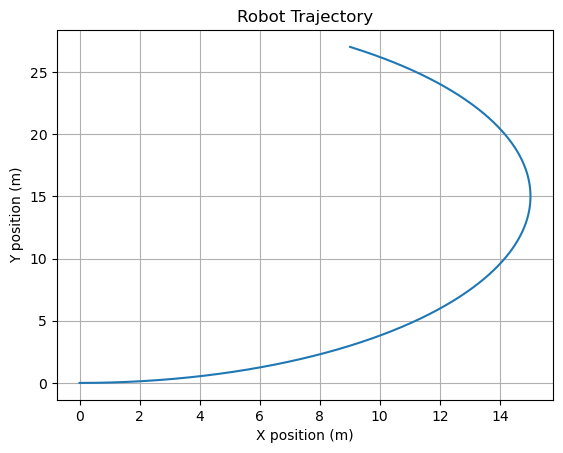

In [3]:
# Run simulation
positions = simulate_motion(x, y, theta, dt, total_time)

# Extract x and y coordinates for plotting
x_coords, y_coords = zip(*positions)

# Plot the trajectory
plt.plot(x_coords, y_coords)
plt.title('Robot Trajectory')
plt.xlabel('X position (m)')
plt.ylabel('Y position (m)')
plt.grid(True)
plt.show()

Mobile Robot Odometry

In [4]:
N = 500   # number of ticks per revolution

# Initial conditions
x, y, theta = 0, 0, 0  # initial position and orientation

# Function to update robot's position using odometry (with ticks)
def update_position_with_ticks(x, y, theta, ticks_l, ticks_r, r, L, N, dt):

    #formulas for deltaSl and deltaSr
    deltaSL= 2 * math.pi * r *(ticks_l/N)
    deltaSR= 2 * math.pi * r * (ticks_r/N)

    x_new = ((deltaSL+deltaSR)/2)*math.cos(theta+((deltaSR-deltaSL)/4*L)) + x #new x position, p' formula
    y_new = ((deltaSL+deltaSR)/2)*math.sin(theta+((deltaSR-deltaSL)/4*L)) + y #new y position, p' formula
    theta_new = ((deltaSR-deltaSL)/2*L) + theta

    return x_new, y_new, theta_new

# Simulate motion using encoder ticks for 100 seconds
def simulate_motion_with_ticks(x, y, theta, dt, total_time):
    positions_with_ticks = [(x, y)]
    ticks_l = 15 # ticks on the left wheel
    ticks_r = 10 # ticks on the right wheel (modify these to test)
    for _ in range(int(total_time / dt)):
        x, y, theta = update_position_with_ticks(x, y, theta, ticks_l, ticks_r, r, L, N, dt)
        positions_with_ticks.append((x, y))
    return positions_with_ticks

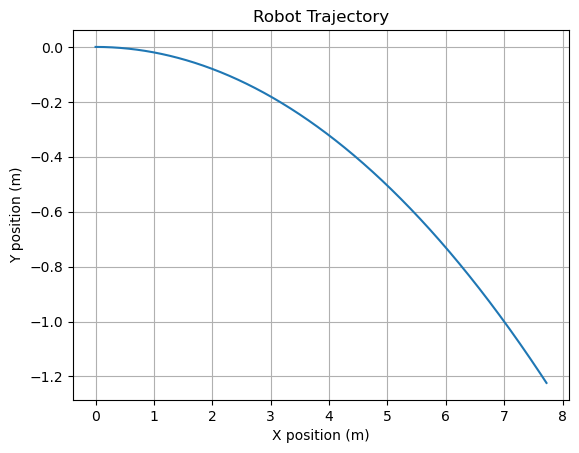

In [5]:
# Run simulation
positions_with_ticks = simulate_motion_with_ticks(x, y, theta, dt, total_time)

# Extract x and y coordinates for plotting
x_coords, y_coords = zip(*positions_with_ticks)

# Plot the trajectory
plt.plot(x_coords, y_coords)
plt.title('Robot Trajectory')
plt.xlabel('X position (m)')
plt.ylabel('Y position (m)')
plt.grid(True)
plt.show()
